In [1]:
#data cloned from github

!git clone https://github.com/DevanandamS/Bank_classifier.git
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)
import os
from keras.optimizers import Adam, sgd, Adadelta
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout
import random
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

fatal: destination path 'Bank_classifier' already exists and is not an empty directory.


1.13.1


Using TensorFlow backend.


In [2]:
#Creating dataframe and loading csv values

datadir = 'Bank_classifier'
data = pd.read_csv(os.path.join(datadir, 'Churn_Modelling.csv'))
pd.set_option('display.max_colwidth', -1)
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
#Implementing label encoder

data['Geography'] = data['Geography'].astype('category').cat.codes
data['Gender'] = data['Gender'].astype('category').cat.codes
data_df = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])
data_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#Setting Y_train and Y_test values

row_count = 7000
Y_data= data_df['Exited'].values
Y_train = Y_data[0:row_count]
Y_test = Y_data[row_count:]
print("Y_train and Y_test splitted..")

#Setting X_train and X_test values

x_data = data_df.drop(columns=['Exited'])
x_train = x_data.iloc[0:row_count,:]
x_test = x_data.iloc[row_count:,:]
print("X_train and X_test splitted..")


Y_train and Y_test splitted..
X_train and X_test splitted..


In [5]:
#Feature Scaling

features =len(x_train.columns)
scaler_train = MinMaxScaler()
scaler_test = MinMaxScaler()
scaler_train.fit(x_train)
scaler_test.fit(x_test)
X_train = scaler_train.transform(x_train)
X_test = scaler_test.transform(x_test)
print("X_train and X_test are scaled")

X_train and X_test are scaled


C:\Users\Deva\Anaconda37\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Deva\Anaconda37\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [6]:
#Printing dataset shape

print('X_train.shape() = {}'.format(X_train.shape))
print('X_train.min() = {}'.format(X_train.min()))
print('X_train.max() = {}'.format(X_train.max()))

print('-----------------------------------------')

print('Y_train.shape() = {}'.format(Y_train.shape))
print('Y_train.min() = {}'.format(Y_train.min())) 
print('Y_train.max() = {}'.format(Y_train.max()))
      
print('-----------------------------------------')

print('X_test.shape() = {}'.format(X_test.shape))
print('X_test.min() = {}'.format(X_test.min()))
print('X_test.max() = {}'.format(X_test.max()))
      
print('-----------------------------------------')
print('Y_test.shape() = {}'.format(Y_test.shape))
print('Y_test.min() = {}'.format(Y_test.min()))
print('Y_test.max() = {}'.format(Y_test.max()))


X_train.shape() = (7000, 10)
X_train.min() = 0.0
X_train.max() = 1.0000000000000002
-----------------------------------------
Y_train.shape() = (7000,)
Y_train.min() = 0
Y_train.max() = 1
-----------------------------------------
X_test.shape() = (3000, 10)
X_test.min() = 0.0
X_test.max() = 1.0
-----------------------------------------
Y_test.shape() = (3000,)
Y_test.min() = 0
Y_test.max() = 1


In [7]:
#Getting data using train_test_split for training and validation data

def get_data(X, y):
    random = np.random.randint(low=1, high=100, size=1)[0]
    a_train, a_valid, y_tr, y_va = train_test_split(X, y,
                    test_size=0.3,
                    random_state=random, 
                    shuffle=True)   
    y_train = to_categorical(y_tr, 2)
    y_valid = to_categorical(y_va, 2)
    return a_train, a_valid, y_train, y_valid
print("Traning and Validation data are set.")
INPUT_SHAPE = features
BATCH_SIZE = 20

Traning and Validation data are set.


In [8]:
#Creating Stochastic gradient descent model

def create_model_sgd():
    model = Sequential()
    model.add(Dense(INPUT_SHAPE, input_dim=INPUT_SHAPE, activation='relu', name='layer_1'))
    model.add(Dense(15, activation='relu', name='layer_2'))
    model.add(Dense(2, activation='softmax'))
    model.compile(sgd(lr= 0.1), loss = 'mse', metrics = ['accuracy'])
    model.summary()
    return model
print("SGD Model created..") 
model_sgd = create_model_sgd()

SGD Model created..
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_1 (Dense)              (None, 10)                110       
_________________________________________________________________
layer_2 (Dense)              (None, 15)                165       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 32        
Total params: 307
Trainable params: 307
Non-trainable params: 0
_________________________________________________________________


Instructions for updating:
Use tf.cast instead.
Train on 4900 samples, validate on 2100 samples
Epoch 1/10
4900/4900 [==============================] - 1s 212us/step - loss: 0.1595 - acc: 0.7924 - val_loss: 0.1604 - val_acc: 0.7890
Epoch 2/10
4900/4900 [==============================] - 1s 139us/step - loss: 0.1544 - acc: 0.7959 - val_loss: 0.1573 - val_acc: 0.7890
Epoch 3/10
4900/4900 [==============================] - 1s 154us/step - loss: 0.1519 - acc: 0.7959 - val_loss: 0.1550 - val_acc: 0.7890
Epoch 4/10
4900/4900 [==============================] - 1s 140us/step - loss: 0.1498 - acc: 0.7959 - val_loss: 0.1547 - val_acc: 0.7890
Epoch 5/10
4900/4900 [==============================] - 1s 174us/step - loss: 0.1481 - acc: 0.7959 - val_loss: 0.1517 - val_acc: 0.7886
Epoch 6/10
4900/4900 [==============================] - 1s 161us/step - loss: 0.1461 - acc: 0.7990 - val_loss: 0.1499 - val_acc: 0.7895
Epoch 7/10
4900/4900 [==============================] - 1s 139us/step - loss: 0.1446 - a

Text(0.5, 0, 'epoch')

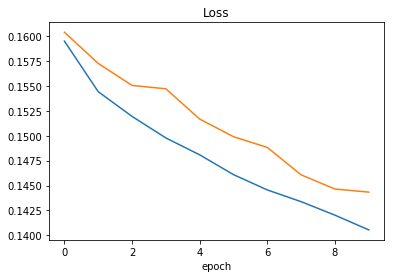

In [9]:
x_train, x_valid, y_train, y_valid = get_data(X_train, Y_train)
history_sgd = model_sgd.fit(x_train, y_train,
                    batch_size=BATCH_SIZE, 
                    epochs=10,
                    verbose=1,
                    shuffle=True,
                    validation_data=(x_valid, y_valid))


#plot on train and validation loss

plt.plot(history_sgd.history['loss'])
plt.plot(history_sgd.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')


Text(0.5, 0, 'epoch')

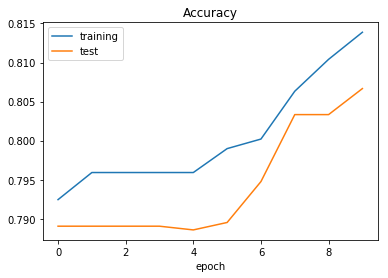

In [10]:
#plot on train and validation accuracy

plt.plot(history_sgd.history['acc'])
plt.plot(history_sgd.history['val_acc'])
plt.legend(['training','test'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [11]:
#Creating Adadelta model

def create_model_Adadelta():
    model = Sequential()
    model.add(Dense(INPUT_SHAPE, input_dim=INPUT_SHAPE, activation='relu', name='layer_1'))
    model.add(Dense(15, activation='relu', name='layer_2'))
    model.add(Dense(2, activation='softmax'))
    model.compile(Adadelta(lr= 0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])
    model.summary()
    return model
print("Adadelta Model created..") 
model_Adadelta = create_model_Adadelta()

Adadelta Model created..
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_1 (Dense)              (None, 10)                110       
_________________________________________________________________
layer_2 (Dense)              (None, 15)                165       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 32        
Total params: 307
Trainable params: 307
Non-trainable params: 0
_________________________________________________________________


Train on 4900 samples, validate on 2100 samples
Epoch 1/15
4900/4900 [==============================] - 2s 311us/step - loss: 0.6192 - acc: 0.7606 - val_loss: 0.6108 - val_acc: 0.7690
Epoch 2/15
4900/4900 [==============================] - 1s 177us/step - loss: 0.6063 - acc: 0.7786 - val_loss: 0.5988 - val_acc: 0.7790
Epoch 3/15
4900/4900 [==============================] - 1s 186us/step - loss: 0.5946 - acc: 0.7863 - val_loss: 0.5881 - val_acc: 0.7857
Epoch 4/15
4900/4900 [==============================] - 1s 186us/step - loss: 0.5843 - acc: 0.7912 - val_loss: 0.5789 - val_acc: 0.7881
Epoch 5/15
4900/4900 [==============================] - 1s 180us/step - loss: 0.5753 - acc: 0.7945 - val_loss: 0.5708 - val_acc: 0.7890
Epoch 6/15
4900/4900 [==============================] - 1s 169us/step - loss: 0.5675 - acc: 0.7947 - val_loss: 0.5638 - val_acc: 0.7890
Epoch 7/15
4900/4900 [==============================] - 1s 176us/step - loss: 0.5608 - acc: 0.7951 - val_loss: 0.5580 - val_acc: 0.7895


Text(0.5, 0, 'epoch')

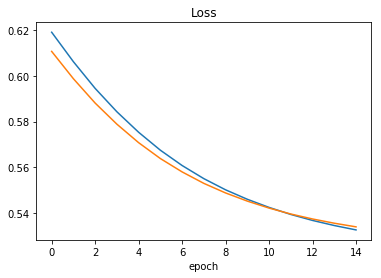

In [12]:
history_Adadelta = model_Adadelta.fit(x_train, y_train,
                    batch_size=BATCH_SIZE, 
                    epochs=15,
                    verbose=1,
                    shuffle=True,
                    validation_data=(x_valid, y_valid))


#plot on train and validation loss

plt.plot(history_Adadelta.history['loss'])
plt.plot(history_Adadelta.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

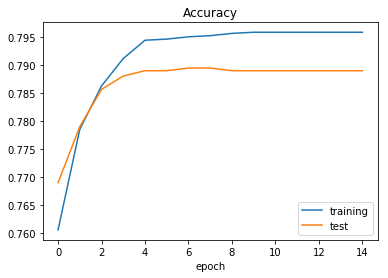

In [13]:
#plot on train and validation accuracy

plt.plot(history_Adadelta.history['acc'])
plt.plot(history_Adadelta.history['val_acc'])
plt.legend(['training','test'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [14]:
#Creating Adam model


def create_model_Adam():
    model = Sequential()
    model.add(Dense(INPUT_SHAPE, input_dim=INPUT_SHAPE, activation='relu', name='layer_1'))
    model.add(Dense(15, activation='relu', name='layer_2'))
    model.add(Dense(2, activation='softmax'))
    model.compile(Adam(lr= 0.003), loss = 'categorical_crossentropy', metrics = ['accuracy'])
    model.summary()
    return model
print("Adam Model created..") 
model_Adam = create_model_Adam()

Adam Model created..
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_1 (Dense)              (None, 10)                110       
_________________________________________________________________
layer_2 (Dense)              (None, 15)                165       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 32        
Total params: 307
Trainable params: 307
Non-trainable params: 0
_________________________________________________________________


Train on 4900 samples, validate on 2100 samples
Epoch 1/15
4900/4900 [==============================] - 1s 299us/step - loss: 0.5129 - acc: 0.7645 - val_loss: 0.4806 - val_acc: 0.7890
Epoch 2/15
4900/4900 [==============================] - 1s 161us/step - loss: 0.4594 - acc: 0.7986 - val_loss: 0.4586 - val_acc: 0.8033
Epoch 3/15
4900/4900 [==============================] - 1s 157us/step - loss: 0.4402 - acc: 0.8133 - val_loss: 0.4525 - val_acc: 0.7976
Epoch 4/15
4900/4900 [==============================] - 1s 163us/step - loss: 0.4265 - acc: 0.8131 - val_loss: 0.4292 - val_acc: 0.8133
Epoch 5/15
4900/4900 [==============================] - 1s 170us/step - loss: 0.4155 - acc: 0.8176 - val_loss: 0.4144 - val_acc: 0.8157
Epoch 6/15
4900/4900 [==============================] - 1s 165us/step - loss: 0.3989 - acc: 0.8284 - val_loss: 0.3980 - val_acc: 0.8324
Epoch 7/15
4900/4900 [==============================] - 1s 189us/step - loss: 0.3810 - acc: 0.8361 - val_loss: 0.3800 - val_acc: 0.8419


Text(0.5, 0, 'epoch')

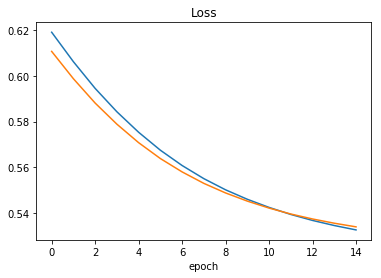

In [15]:
history_Adam = model_Adam.fit(x_train, y_train,
                    batch_size=BATCH_SIZE, 
                    epochs=15,
                    verbose=1,
                    shuffle=True,
                    validation_data=(x_valid, y_valid))

plt.plot(history_Adadelta.history['loss'])
plt.plot(history_Adadelta.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')


Text(0.5, 0, 'epoch')

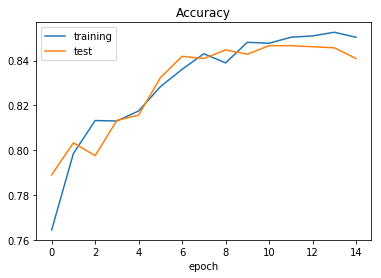

In [16]:
#plot on train and validation accuracy

plt.plot(history_Adam.history['acc'])
plt.plot(history_Adam.history['val_acc'])
plt.legend(['training','test'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [17]:
#Test Score..

y_test = to_categorical(Y_test, 2)
accuracy_sgd = model_sgd.evaluate(X_test, y_test, verbose=1)
print('----------------------------')
print('Test accuracy_sgd:', accuracy_sgd[1])
accuracy_Adadelta = model_Adadelta.evaluate(X_test, y_test, verbose=1)
print('----------------------------')
print('Test accuracy_Adadelta:', accuracy_Adadelta[1])
accuracy_Adam = model_Adam.evaluate(X_test, y_test, verbose=1)
print('----------------------------')
print('Test accuracy_Adam:', accuracy_Adam[1])

3000/3000 [==============================] - 0s 34us/step
----------------------------
Test accuracy_sgd: 0.8123333333333334
3000/3000 [==============================] - 0s 39us/step
----------------------------
Test accuracy_Adadelta: 0.8020000001589457
3000/3000 [==============================] - 0s 44us/step
----------------------------
Test accuracy_Adam: 0.8283333331743876
